<a href="https://colab.research.google.com/github/ritwiks9635/CSV_Projects_File/blob/main/Adult-census-income%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Module**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**This dataset no Missing value available, but many "?" available, so I convert "?" == Nan**

In [13]:
data[data == "?"] = np.nan

In [14]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [15]:
columns = ["workclass", "occupation", "native.country"]

In [16]:
for x in columns:
  data[x].fillna(data[x].mode()[0], inplace=True)

In [17]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

***Split dataset***

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop(["income"], axis = 1)
y = data["income"]
X.shape, y.shape

((32561, 14), (32561,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [30]:
X_train.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype=object)

In [31]:
categorical = [cat for cat in X_train.columns if data[cat].dtype == "object"]
categorical

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

***Feature Engineering***

In [32]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
for cat in categorical:
  X_train[cat] = le.fit_transform(X_train[cat])
  X_test[cat] = le.fit_transform(X_test[cat])

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24420 entries, 29 to 23654
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             24420 non-null  int64
 1   workclass       24420 non-null  int64
 2   fnlwgt          24420 non-null  int64
 3   education       24420 non-null  int64
 4   education.num   24420 non-null  int64
 5   marital.status  24420 non-null  int64
 6   occupation      24420 non-null  int64
 7   relationship    24420 non-null  int64
 8   race            24420 non-null  int64
 9   sex             24420 non-null  int64
 10  capital.gain    24420 non-null  int64
 11  capital.loss    24420 non-null  int64
 12  hours.per.week  24420 non-null  int64
 13  native.country  24420 non-null  int64
dtypes: int64(14)
memory usage: 2.8 MB


In [34]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
29,38,3,175360,0,6,4,9,1,4,1,0,2559,90,38
12181,25,3,131463,9,13,2,9,0,4,1,0,0,40,38
18114,63,5,181561,15,10,0,3,1,4,1,0,0,50,38
4278,50,0,251585,9,13,0,3,1,4,1,0,0,55,38
12050,23,3,145964,15,10,4,9,1,4,1,0,0,40,38


***Feature Scaling***

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data1 = sc.fit_transform(X_train)
data2 = sc.fit_transform(X_test)
X_train = pd.DataFrame(data1, columns = X.columns)
X_test = pd.DataFrame(data2, columns = X.columns)

In [39]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-0.039325,-0.087470,-0.137200,-2.649481,-1.579587,0.925522,0.720218,-0.276958,0.394124,0.701901,-0.147227,6.095942,3.999569,0.261979
1,-0.995746,-0.087470,-0.554949,-0.329225,1.131076,-0.402674,0.720218,-0.899216,0.394124,0.701901,-0.147227,-0.217720,-0.044193,0.261979
2,1.799945,1.713562,-0.078187,1.217611,-0.030636,-1.730871,-0.787797,-0.276958,0.394124,0.701901,-0.147227,-0.217720,0.764559,0.261979
3,0.843525,-2.789019,0.588202,-0.329225,1.131076,-1.730871,-0.787797,-0.276958,0.394124,0.701901,-0.147227,-0.217720,1.168936,0.261979
4,-1.142887,-0.087470,-0.416949,1.217611,-0.030636,0.925522,0.720218,-0.276958,0.394124,0.701901,-0.147227,-0.217720,-0.044193,0.261979


In [43]:
y_train.value_counts()

<=50K    18523
>50K      5897
Name: income, dtype: int64

***Build the Model to Train***

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
l_r = LogisticRegression()
l_r.fit(X_train, y_train)

LogisticRegression()

***Evaluate The Model***

In [47]:
pred = l_r.predict(X_test)

In [55]:
accuracy_score(pred, y_test)

0.8252057486795235

In [56]:
l_r.score(X_train, y_train)

0.8256756756756757

In [58]:
l_r.score(X_test, y_test)

0.8252057486795235

In [61]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(pred, y_test)

In [63]:
c_m

array([[5817, 1043],
       [ 380,  901]])

<Axes: >

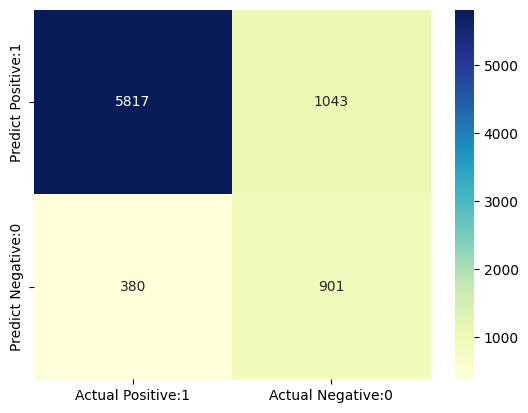

In [64]:
cm_matrix = pd.DataFrame(data=c_m, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')